# EDA and applying Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data

In [2]:
data = pd.read_csv('titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Missing Data

In [4]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


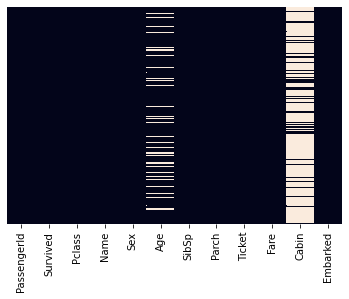

In [5]:
sns.heatmap(data.isnull(), yticklabels = False, cbar=False,)

In [6]:
sns.set_style('whitegrid')

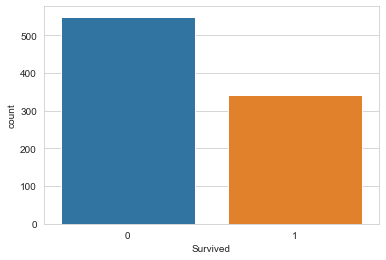

In [7]:
sns.countplot(x = 'Survived',data = data)

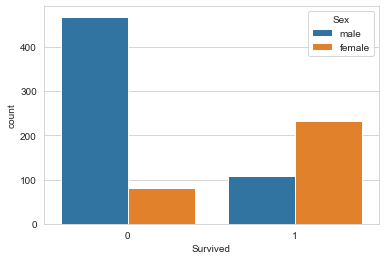

In [8]:
sns.countplot(x = 'Survived', hue = 'Sex', data = data)

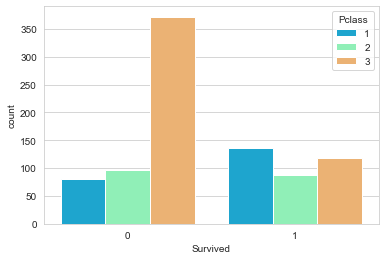

In [9]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = data, palette = 'rainbow')

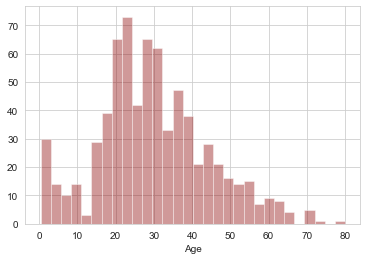

In [10]:
sns.distplot(data['Age'],  kde = False, color = 'darkred', bins = 30)

(array([30., 14., 10., 14.,  3., 29., 39., 65., 73., 42., 65., 62., 33.,
        47., 38., 21., 28., 21., 16., 14., 15.,  7.,  9.,  8.,  4.,  0.,
         5.,  1.,  0.,  1.]),
 array([ 0.42      ,  3.07266667,  5.72533333,  8.378     , 11.03066667,
        13.68333333, 16.336     , 18.98866667, 21.64133333, 24.294     ,
        26.94666667, 29.59933333, 32.252     , 34.90466667, 37.55733333,
        40.21      , 42.86266667, 45.51533333, 48.168     , 50.82066667,
        53.47333333, 56.126     , 58.77866667, 61.43133333, 64.084     ,
        66.73666667, 69.38933333, 72.042     , 74.69466667, 77.34733333,
        80.        ]),
 <a list of 30 Patch objects>)

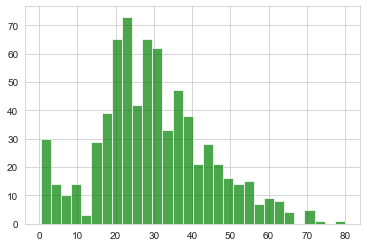

In [11]:
plt.hist(data['Age'], bins = 30, color = 'green', alpha = 0.7)

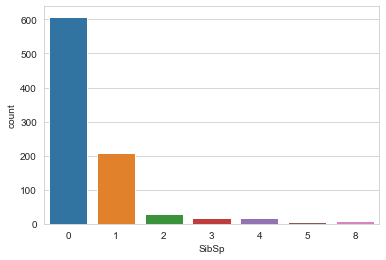

In [12]:
sns.countplot(x = 'SibSp', data= data)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <a list of 20 Patch objects>)

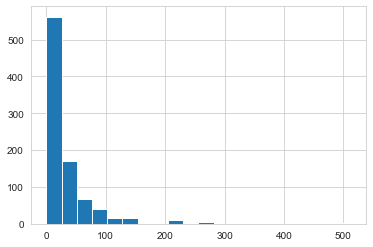

In [13]:
plt.hist(data['Fare'], bins = 20)

# Handling Missing Data 

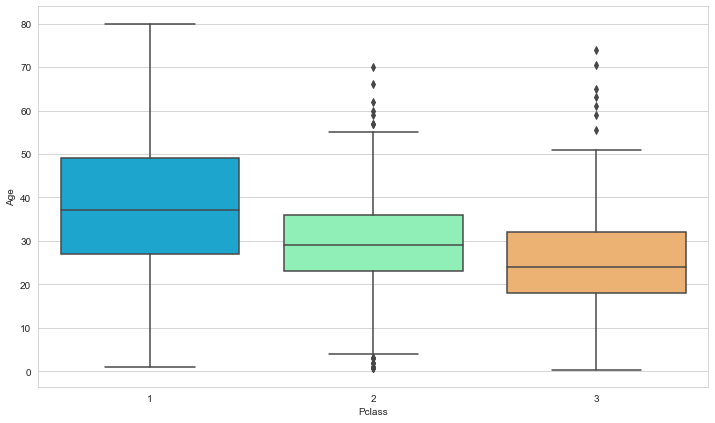

In [14]:
plt.figure(figsize = (12,7))
sns.boxplot(x=data['Pclass'], y=data['Age'], palette = 'rainbow')

In [15]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
     
    else:
        return Age

In [16]:
data['Age'] = data[['Age','Pclass']].apply(impute_age, axis=1)

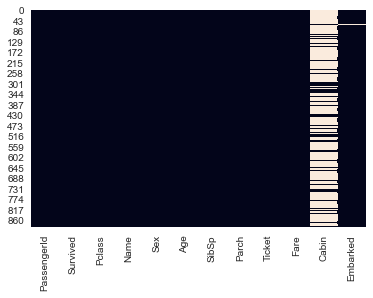

In [17]:
sns.heatmap(data.isnull(), cbar = False)

In [18]:
data.drop('Cabin', axis = 1, inplace = True)

In [19]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


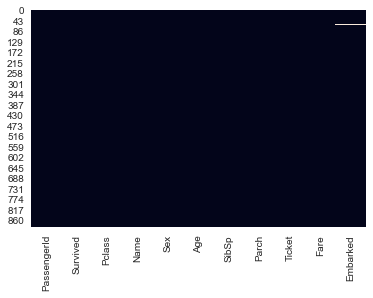

In [20]:
sns.heatmap(data.isnull(), cbar = False)

In [21]:
pd.isnull(data['Embarked'])

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [22]:
data.dropna(inplace=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [24]:
embark = pd.get_dummies(data['Embarked'], drop_first=True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [25]:
sex = pd.get_dummies(data['Sex'], drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [26]:
data.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis = 1, inplace = True)

In [27]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [28]:
data = pd.concat([data,sex,embark], axis=1)

In [29]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Building a Logistic Regression Model 

In [30]:
# Let's split training and testing data first

In [31]:
data.drop('Survived', axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [32]:
data['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived', axis=1),
                                                   data['Survived'], test_size= 0.90,
                                                   random_state = 101)

# Training and Predicting 

In [35]:
from sklearn.linear_model import LogisticRegression

In [37]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Masab Umair\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
predictions = logmodel.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
accuracy=confusion_matrix(y_test,predictions)

In [41]:
accuracy

array([[429,  62],
       [113, 197]], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7815230961298377

In [44]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,

# Evaluation

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       491
           1       0.76      0.64      0.69       310

    accuracy                           0.78       801
   macro avg       0.78      0.75      0.76       801
weighted avg       0.78      0.78      0.78       801

